<a href="https://colab.research.google.com/github/Codift05/ColabArchive/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

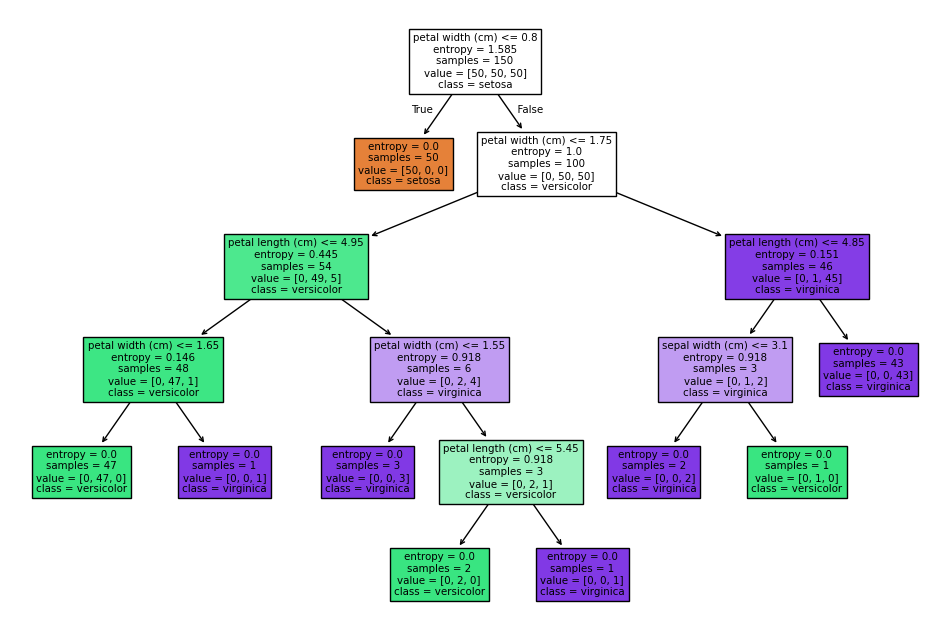

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train model
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# Visualize tree
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=list(iris.target_names),
          filled=True)
plt.show()

In [ ]:
import pandas as pd

train_df = pd.read_csv("/content/train.csv")
gender_submission_df = pd.read_csv("/content/gender_submission.csv")
test_df = pd.read_csv("/content/test.csv")

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train_df[features].copy()
y_train = train_df['Survived']

# Handle missing values in 'Age' with median
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)

# Handle missing values in 'Fare' with median (although not explicitly in instructions, it's good practice)
X_train['Fare'].fillna(X_train['Fare'].median(), inplace=True)

# Handle missing values in 'Embarked' with mode
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)

# Encode categorical features
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)

display(X_train.head())
display(y_train.head())

/tmp/ipython-input-2206087241.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
/tmp/ipython-input-2206087241.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Shape of X_train_split:", X_train_split.shape)
print("Shape of X_test_split:", X_test_split.shape)
print("Shape of y_train_split:", y_train_split.shape)
print("Shape of y_test_split:", y_test_split.shape)

Shape of X_train_split: (712, 8)
Shape of X_test_split: (179, 8)
Shape of y_train_split: (712,)
Shape of y_test_split: (179,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train_split, y_train_split)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test_split)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_split, y_pred)

# Print the accuracy score
print(f"Accuracy on the test set: {accuracy:.4f}")

Accuracy on the test set: 0.7821


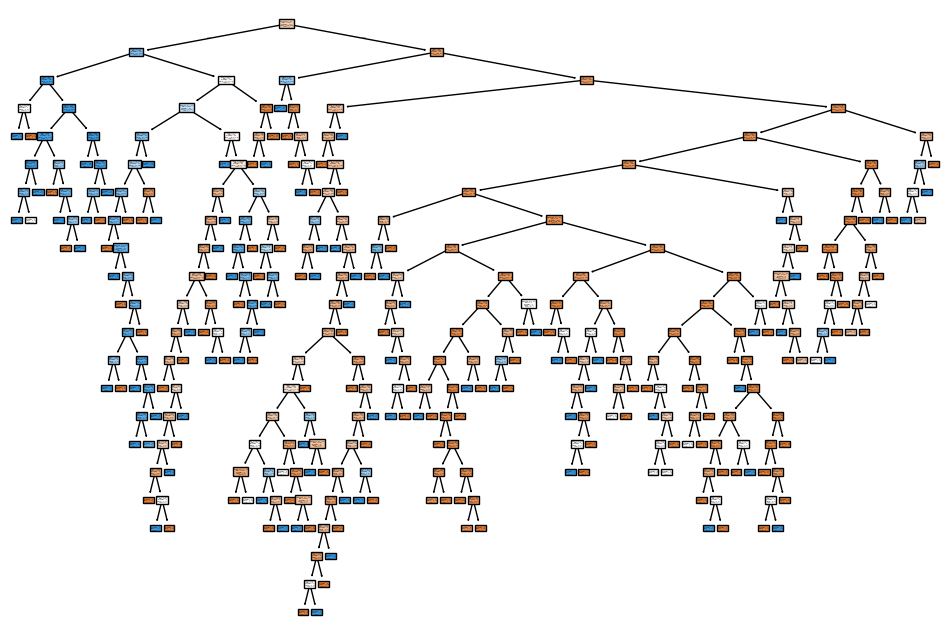

In [ ]:
# Visualize tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model,
          feature_names=X_train_split.columns.tolist(),
          class_names=[str(x) for x in y_train_split.unique()],
          filled=True)
plt.show()

## Summary:

### Data Analysis Key Findings

* The Decision Tree model achieved an accuracy of 0.7821 on the test set.
* The model was trained on features including passenger class, sex, age, number of siblings/spouses aboard, number of parents/children aboard, fare, and embarkation point.
* Missing values in 'Age' and 'Fare' were imputed with the median, and missing values in 'Embarked' were imputed with the mode.
* Categorical features 'Sex' and 'Embarked' were one-hot encoded.

### Insights or Next Steps

* The accuracy of 0.7821 is a reasonable starting point, but further hyperparameter tuning of the Decision Tree or exploring other models could potentially improve performance.
* Analyzing the structure of the visualized decision tree can provide insights into which features the model considers most important for predicting survival.


Akurasi (model prunned): 0.7653631284916201


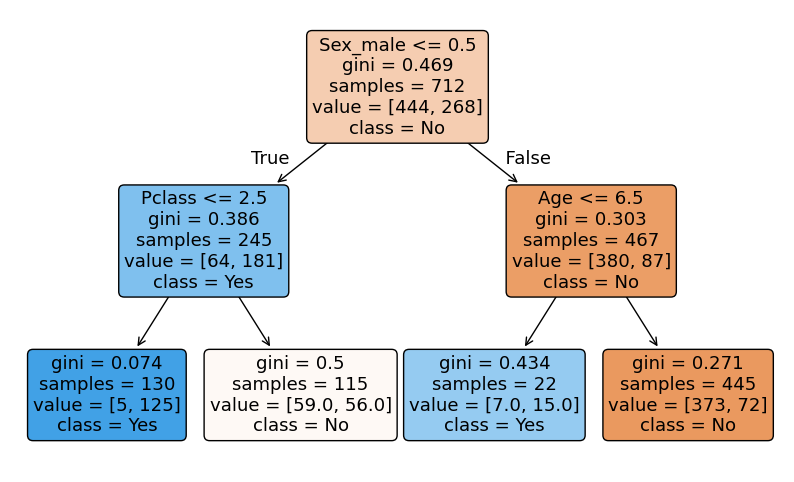

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

clf_pruned = DecisionTreeClassifier (criterion = 'gini', max_depth = 2, random_state = 0, min_samples_split = 4)

clf_pruned.fit(x_train, y_train)

print("Akurasi (model prunned):", clf_pruned.score(x_test, y_test))

plt.figure(figsize = (10, 6))
plot_tree(clf_pruned,
          feature_names = list(X_train.columns),
          class_names = ['No', 'Yes'],
          filled = True,
          rounded = True
          )
plt.show()

Akurasi (model pruned): 0.9666666666666667


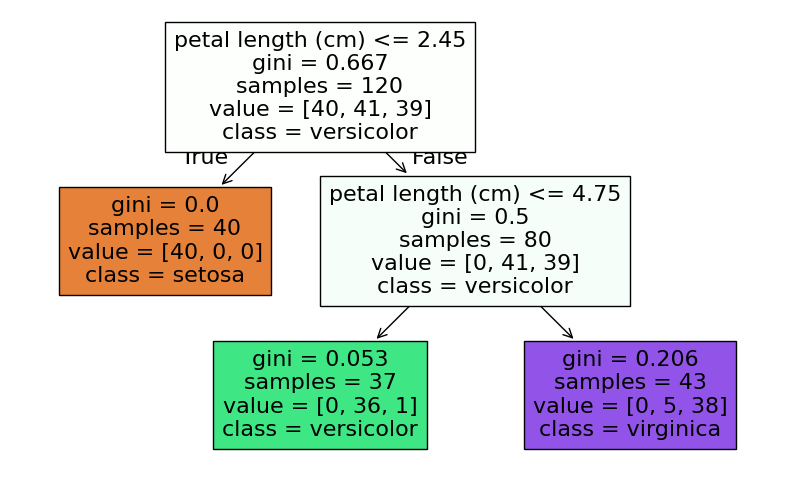

In [ ]:
# 1. Import library
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 2. Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# 3. Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Buat Decision Tree dengan pruning
clf_pruned = DecisionTreeClassifier(
    criterion='gini',               # Berdasarkan GINI Impurity
    max_depth=2,                    # Batasi kedalaman pohon
    min_samples_split=4,            # minimal data untuk melakukan split
    random_state=42
)
# 5. Latih model
clf_pruned.fit(X_train, y_train)

# 6. Evaluasi akurasi
print("Akurasi (model pruned):", clf_pruned.score(X_test, y_test))

# 7. Visualisasi pohon hasil pruning
plt.figure(figsize=(10,6))
plot_tree(clf_pruned,
          feature_names=iris.feature_names,
          class_names=list(iris.target_names),
          filled=True)

plt.show()